<a href="https://colab.research.google.com/github/ahmedmedrah/mnist/blob/master/using_keras_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
# Set seed
np.random.seed(0)

Using TensorFlow backend.


In [0]:
# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()
# Reshape training image data into features
data_train = data_train.reshape(data_train.shape[0], 28, 28, 1)
# Reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], 28, 28, 1)
# Rescale pixel intensity to between 0 and 1
features_train = data_train / 255
features_test = data_test / 255
# One-hot encode target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

In [0]:
# Start neural network
network = Sequential()
# Add convolutional layer with 16 filters, a 3x3 window, and ReLU activation function
network.add(Conv2D(filters=32,
            kernel_size=(3, 3),
            input_shape=(28, 28, 1),
            activation='relu'))
# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer
network.add(Dropout(0.3))
# Add convolutional layer with 32 filters, a 3x3 window, and ReLU activation function
network.add(Conv2D(filters=64,
            kernel_size=(3, 3),
            input_shape=(28, 28, 1),
            activation='relu'))
# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer
network.add(Dropout(0.3))
# Add layer to flatten input
network.add(Flatten())
# Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))
# Add dropout layer
network.add(Dropout(0.3))
network.add(Dense(128, activation="relu"))
# Add dropout layer
network.add(Dropout(0.3))
# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))
# Compile neural network
network.compile(loss="categorical_crossentropy", # Cross-entropy
                optimizer="adam", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

In [5]:
# Train neural network
history = network.fit(features_train, # Features
            target_train, # Target
            epochs=20, # Number of epochs
            verbose=2, # only one line per epoch
            batch_size=256, # Number of observations per batch
            validation_data=(features_test, target_test)) # Data for evaluation

Epoch 1/20
235/235 [==============================] - 2s 9ms/step - loss: 0.5127 - accuracy: 0.8344 - val_loss: 0.0894 - val_accuracy: 0.9732
Epoch 2/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1361 - accuracy: 0.9599 - val_loss: 0.0558 - val_accuracy: 0.9829
Epoch 3/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0995 - accuracy: 0.9708 - val_loss: 0.0406 - val_accuracy: 0.9871
Epoch 4/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0839 - accuracy: 0.9750 - val_loss: 0.0374 - val_accuracy: 0.9875
Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0707 - accuracy: 0.9794 - val_loss: 0.0295 - val_accuracy: 0.9901
Epoch 6/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0631 - accuracy: 0.9814 - val_loss: 0.0284 - val_accuracy: 0.9913
Epoch 7/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0578 - accuracy: 0.9826 - val_loss: 0.0317 - val_accuracy: 0.9896
Epoch 

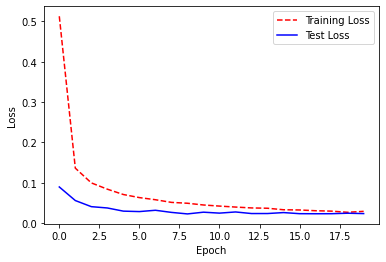

In [6]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# Create count of the number of epochs
epoch_count = history.epoch
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

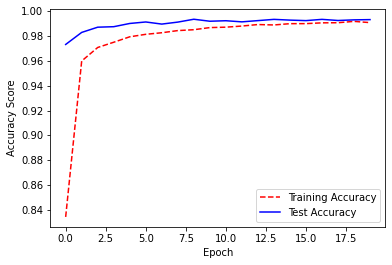

In [7]:
# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

In [0]:
test = pd.read_csv('test.csv')
test = test / 255.0
test = test.values.reshape(-1,28,28,1)
results=network.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("cnn_mnist.csv",index=False)